In [20]:
from langchain_cohere import ChatCohere
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict

In [21]:
class JokeState(TypedDict):
    topic:str
    jokes:str
    explanation:str

In [22]:
load_dotenv()
llm=ChatCohere(model="command-r-plus-08-2024")

In [23]:
def Gen_joke(state:JokeState)->dict:
    prompt=f"Write a joke on the given topic,Here is the topic:{state["topic"]}"
    response=llm.invoke(prompt)
    return {"jokes":response.content}

def Exp_joke(state:JokeState)->dict:
    prompt=f"Explain this joke:{state["jokes"]}"
    response=llm.invoke(prompt)
    return {"explanation":response.content}

In [24]:
graph=StateGraph(JokeState)

graph.add_node("generate_joke",Gen_joke)
graph.add_node("explain_joke",Exp_joke)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","explain_joke")
graph.add_edge("explain_joke",END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)

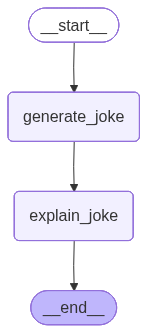

In [25]:
workflow

In [26]:
config1={"configurable":{"thread_id":"1"}}
workflow.invoke({"topic":"Cat"},config=config1)

{'topic': 'Cat',
 'jokes': 'Why did the cat join the Red Cross?\nBecause she wanted to be a first-aid kit!',
 'explanation': 'This joke is a play on words, combining the idea of a cat\'s meowing sound with the concept of a first-aid kit.\n\nThe Red Cross is a well-known humanitarian organization that provides emergency assistance and aid during disasters and crises. One of its primary functions is to offer medical help and first-aid services.\n\nWhen a cat meows, it sounds like it is saying "meow," which is phonetically similar to the word "aid." So, the joke suggests that a cat joined the Red Cross to become a "first-aid kit," as in a "meow-aid kit." This pun humorously connects the cat\'s meow with the idea of providing assistance and aid, which is the primary role of the Red Cross.'}

In [27]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Cat', 'jokes': 'Why did the cat join the Red Cross?\nBecause she wanted to be a first-aid kit!', 'explanation': 'This joke is a play on words, combining the idea of a cat\'s meowing sound with the concept of a first-aid kit.\n\nThe Red Cross is a well-known humanitarian organization that provides emergency assistance and aid during disasters and crises. One of its primary functions is to offer medical help and first-aid services.\n\nWhen a cat meows, it sounds like it is saying "meow," which is phonetically similar to the word "aid." So, the joke suggests that a cat joined the Red Cross to become a "first-aid kit," as in a "meow-aid kit." This pun humorously connects the cat\'s meow with the idea of providing assistance and aid, which is the primary role of the Red Cross.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0d130f-3353-6cb7-8002-44160e0fe05b'}}, metadata={'source': 'loop', 'step': 2, 'parents': 

In [ ]:
# Here we can see the state saved at every checkpoint(after every superstep)
#start from below 

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Cat', 'jokes': 'Why did the cat join the Red Cross?\nBecause she wanted to be a first-aid kit!', 'explanation': 'This joke is a play on words, combining the idea of a cat\'s meowing sound with the concept of a first-aid kit.\n\nThe Red Cross is a well-known humanitarian organization that provides emergency assistance and aid during disasters and crises. One of its primary functions is to offer medical help and first-aid services.\n\nWhen a cat meows, it sounds like it is saying "meow," which is phonetically similar to the word "aid." So, the joke suggests that a cat joined the Red Cross to become a "first-aid kit," as in a "meow-aid kit." This pun humorously connects the cat\'s meow with the idea of providing assistance and aid, which is the primary role of the Red Cross.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0d130f-3353-6cb7-8002-44160e0fe05b'}}, metadata={'source': 'loop', 'step': 2, 'parents':

In [30]:
config2={"configurable":{"thread_id":"2"}}
workflow.invoke({"topic":"Dog"},config=config2)

{'topic': 'Dog',
 'jokes': "Why did the dog sit in the shade?\n\nBecause he didn't want to be a hot dog!",
 'explanation': 'This joke plays on the homophonic nature of the words "hot" and "hot dog." The dog sitting in the shade is a literal interpretation of wanting to avoid becoming physically hot. However, the punchline humorously suggests that the dog is also avoiding becoming a "hot dog," which is a popular food item made from processed meat, often associated with grilled sausages. The joke relies on the double meaning of the word "hot" to create a playful and amusing twist.'}

In [ ]:
workflow.get_state(config2)